In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('liwc_raw_scores.csv') 
X = df.drop(['party','userid'], axis=1)
y = df['party']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_category = to_categorical(y_train_encoded)
y_test_category = to_categorical(y_test_encoded)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100,activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=2, activation='softmax'))
          

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

result = model.fit(X_train, y_train_category,epochs=100, shuffle=True,verbose=2)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_category, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
predictions = model.predict_classes(X_test[:10])
prediction_labels = label_encoder.inverse_transform(predictions)
prediction_labels

print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:10])}")

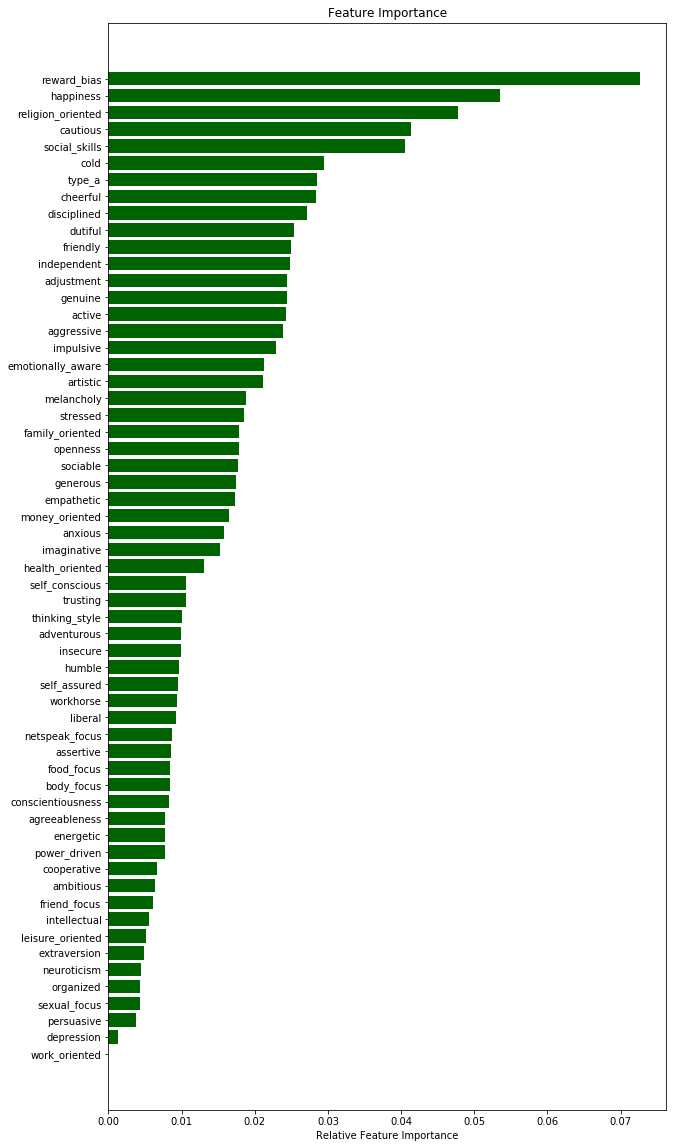

In [19]:

rf = RandomForestClassifier()
rf.fit(X,y)

imp_feature = rf.feature_importances_
sorted_feature = np.argsort(imp_feature)
pos = np.arange(sorted_feature.shape[0]) + 0.5
plt.barh(pos, imp_feature[sorted_feature], align='center', color='darkgreen')
plt.title('Feature Importance')
plt.xlabel('Relative Feature Importance')
plt.yticks(pos, X.columns[sorted_feature])
fig = plt.gcf()
fig.set_size_inches(10,20)